## Instacart Market Basket Analysis

Using Instacart Data available at Kaggle, I'll be performing an exploratory data analysis on this dataset

In [76]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

## Importing data into dataframe

In [77]:
df_aisles = pd.read_csv('./data/aisles.csv', index_col=None, header=0)
df_departments = pd.read_csv('./data/departments.csv', index_col=None, header=0)
df_o_p_prior = pd.read_csv('./data/order_products__prior.csv', index_col=None, header=0)
df_o_p_train = pd.read_csv('./data/order_products__train.csv', index_col=None, header=0)
df_orders = pd.read_csv('./data/orders.csv', index_col=None, header=0)
df_products = pd.read_csv('./data/products.csv', index_col=None, header=0)


In [78]:
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [79]:
df_order_products = pd.concat([df_o_p_prior, df_o_p_train], axis=0)

In [80]:
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.3 GB


In [81]:
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [82]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [83]:
df_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [84]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [85]:
df_products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [86]:
#Missing Data
total = df_order_products.isnull().sum().sort_values(ascending=False)
percent = (df_order_products.isnull().sum()/df_order_products.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
reordered,0,0.0
add_to_cart_order,0,0.0
product_id,0,0.0
order_id,0,0.0


In [87]:
# Check the number of unique orders and unique products
orders_unique = len(set(df_order_products.order_id))
products_unique = len(set(df_order_products.product_id))
print("There are %s orders for %s products" %(orders_unique, products_unique))

There are 3346083 orders for 49685 products


## Some Questions on the dataset 

### How many products do people add to their carts?

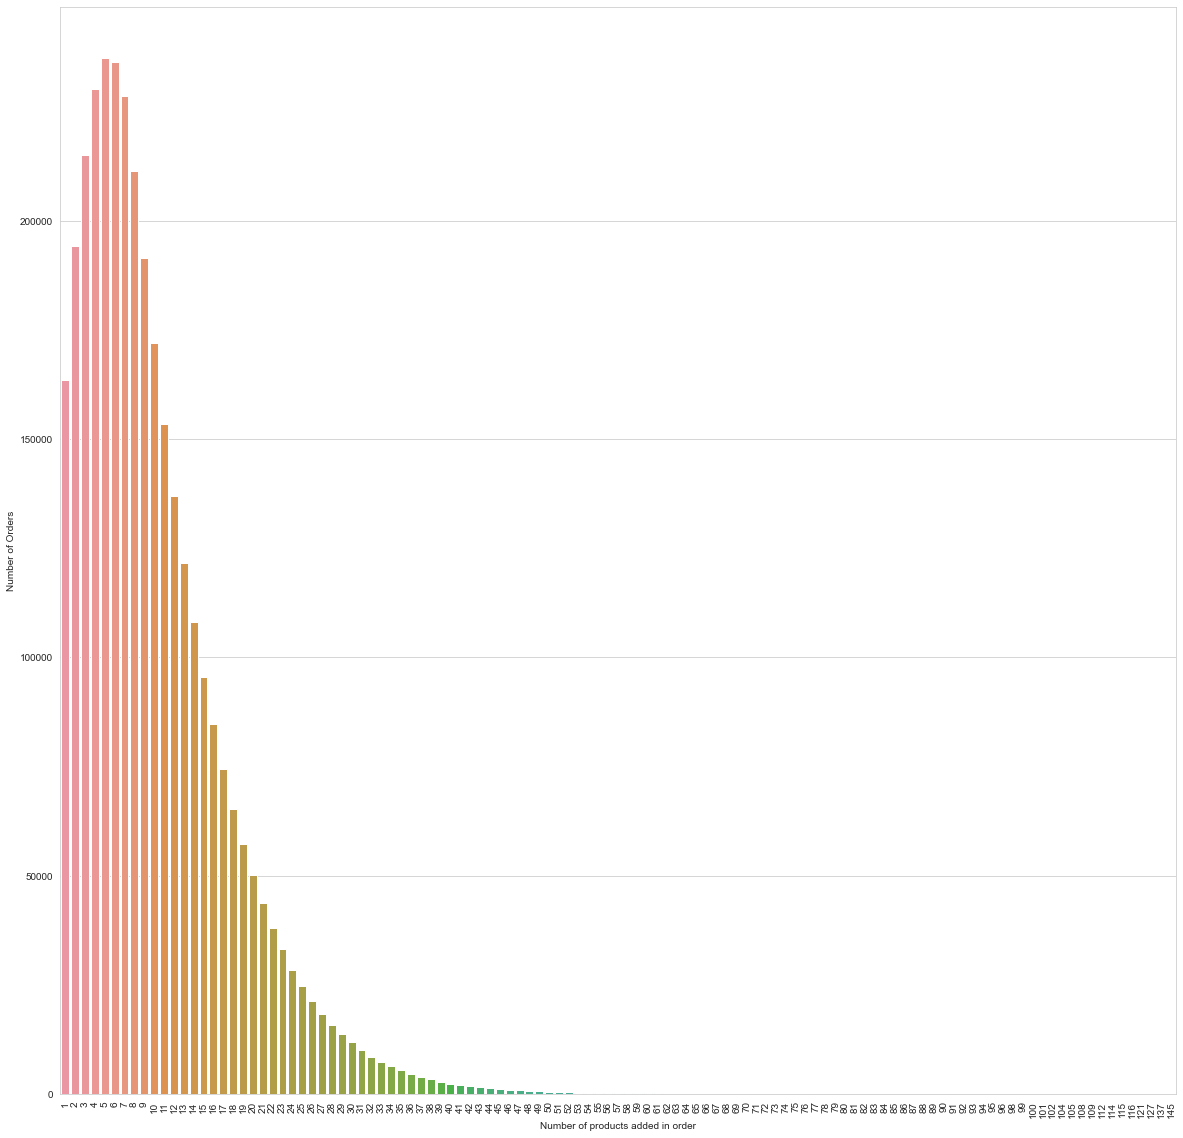

In [46]:
grouped = df_order_products.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)

plt.ylabel('Number of Orders')
plt.xlabel('Number of products added in order')
plt.show()

### Insert Headline


In [88]:
df_trans = pd.merge(df_order_products, df_orders, on='order_id')
df_trans 

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...
33819101,3421063,14233,3,1,169679,train,30,0,10,4.0
33819102,3421063,35548,4,1,169679,train,30,0,10,4.0
33819103,3421070,35951,1,1,139822,train,15,6,10,8.0
33819104,3421070,16953,2,1,139822,train,15,6,10,8.0


In [89]:
cols = [0,1,4]
df2 = df_trans[df_trans.columns[cols]]
#df = df_trans[:,df_trans.loc['order_id':'user_id']]

In [90]:
df_3 = pd.merge(df2, df_products, on='product_id')
df_3

,order_id,product_id,user_id,product_name,aisle_id,department_id
0,2,33120,202279,Organic Egg Whites,86,16
1,26,33120,153404,Organic Egg Whites,86,16
2,120,33120,23750,Organic Egg Whites,86,16
3,327,33120,58707,Organic Egg Whites,86,16
4,390,33120,166654,Organic Egg Whites,86,16
...,...,...,...,...,...,...
33819101,2269288,27499,15012,Non-Dairy Coconut Seven Layer Bar,100,21
33819102,2507248,27499,46748,Non-Dairy Coconut Seven Layer Bar,100,21
33819103,2271346,37703,169335,Ultra Sun Blossom Liquid 90 loads Fabric Enhan...,75,17
33819104,3004244,43725,169709,Sweetart Jelly Beans,100,21


In [91]:
cols = [0,1,2,3]
df = df_3[df_3.columns[cols]]
df

,order_id,product_id,user_id,product_name
0,2,33120,202279,Organic Egg Whites
1,26,33120,153404,Organic Egg Whites
2,120,33120,23750,Organic Egg Whites
3,327,33120,58707,Organic Egg Whites
4,390,33120,166654,Organic Egg Whites
...,...,...,...,...
33819101,2269288,27499,15012,Non-Dairy Coconut Seven Layer Bar
33819102,2507248,27499,46748,Non-Dairy Coconut Seven Layer Bar
33819103,2271346,37703,169335,Ultra Sun Blossom Liquid 90 loads Fabric Enhan...
33819104,3004244,43725,169709,Sweetart Jelly Beans


In [93]:
df.sort_values(by=['order_id'])

,order_id,product_id,user_id,product_name
30698102,1,43633,112108,Lightly Smoked Sardines in Olive Oil
1532449,1,47209,112108,Organic Hass Avocado
17184946,1,10246,112108,Organic Celery Hearts
33046497,1,49302,112108,Bulgarian Yogurt
1039726,1,13176,112108,Bag of Organic Bananas
...,...,...,...,...
32666394,3421083,35211,25247,Organic Strawberry & Mango Dried Tiny Fruits
19123056,3421083,18176,25247,Organic Strawberry Yogurt & Fruit Snack
23718820,3421083,39678,25247,Free & Clear Natural Dishwasher Detergent
29113417,3421083,7854,25247,Freeze Dried Mango Slices


In [131]:
gb = df.groupby(['order_id','user_id'])

In [132]:
result = gb['product_name'].unique()


In [133]:
result = result.reset_index()

In [134]:
result

,order_id,user_id,product_name
0,1,112108,"[Bag of Organic Bananas, Organic Hass Avocado,..."
1,2,202279,"[Organic Egg Whites, Michigan Organic Kale, Ga..."
2,3,205970,[Total 2% with Strawberry Lowfat Greek Straine...
3,4,178520,"[Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr..."
4,5,156122,"[Bag of Organic Bananas, Just Crisp, Parmesan,..."
...,...,...,...
3346078,3421079,108687,[Moisture Soap]
3346079,3421080,52726,"[Organic Cilantro, Organic Whole Milk, Organic..."
3346080,3421081,117076,"[Lime Sparkling Water, Classic Wheat Bread, Di..."
3346081,3421082,175185,"[Raspberries, Strawberries, Toasted Coconut Ch..."


In [136]:
result.sort_values(['order_id','user_id'])

,order_id,user_id,product_name
0,1,112108,"[Bag of Organic Bananas, Organic Hass Avocado,..."
1,2,202279,"[Organic Egg Whites, Michigan Organic Kale, Ga..."
2,3,205970,[Total 2% with Strawberry Lowfat Greek Straine...
3,4,178520,"[Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr..."
4,5,156122,"[Bag of Organic Bananas, Just Crisp, Parmesan,..."
...,...,...,...
3346078,3421079,108687,[Moisture Soap]
3346079,3421080,52726,"[Organic Cilantro, Organic Whole Milk, Organic..."
3346080,3421081,117076,"[Lime Sparkling Water, Classic Wheat Bread, Di..."
3346081,3421082,175185,"[Raspberries, Strawberries, Toasted Coconut Ch..."
